From [PyCBC](http://pycbc.org/pycbc/latest/html/waveform.html)

In [1]:
from pycbc.waveform import td_approximants, fd_approximants

# List of time-domain approximants that are available
print(td_approximants())

# List of frequency-domain approximants that are currently available
#print(fd_approximants())


['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'IMRPhenomXP', 'IMRPhenomXPHM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv2_ROM_DoubleSpi

In [7]:
#necessary imports for get_td_waveform
from pycbc.waveform import get_td_waveform

#plotting either or
import pylab
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


apx is set equal to a waveform we want to generate
takes in various parameters like mass, spin, distance, lowest freq to begin generating at and time between samples.

<class 'str'>


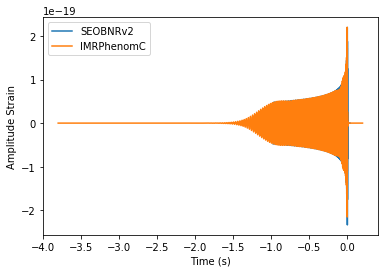

In [8]:
#Generate time series plus and cross polarizations for both approximants
#then plot the plus polarizations

#this is a list
#print(type(['SEOBNRv2', 'IMRPhenomC']))
print(type('SEOBNRv2'))
for apx in ['SEOBNRv2', 'IMRPhenomC']:
    hp, hc = get_td_waveform(approximant=apx,
                                 mass1=10,
                                 mass2=10,
                                 spin1z=0.9,
                                 delta_t=1.0/4096,
                                 f_lower=40)
    #plots only the plus strain of both
    plt.plot(hp.sample_times, hp, label=apx)

plt.ylabel('Amplitude Strain')
plt.xlabel('Time (s)')
plt.legend()
plt.show()

The paper describing 'SEOBNRv4_opt' (used below) is [link](https://arxiv.org/pdf/1611.03703.pdf)

total mass seems to have upper limit of ~500 solar masses

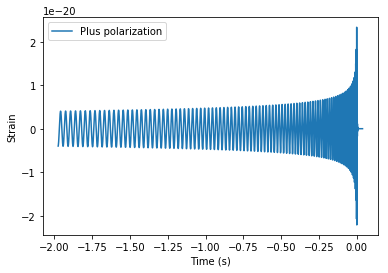

In [17]:
#Adjust the mass and distance parameter to affect signal duration
# and amplitude respectively. 

#key parameters------------------------------------------------------
# The mass of the component objects solar masses
m1 = 10.0
m2 = 10.0

# Start the waveform from 20 Hz
f_lower = 30.0

# The model of the gravitational-wave signal we are using
approximant = 'SEOBNRv4_opt'

# The time between samples that we want
delta_t = 1.0 / 4096


#optional parameters-------------------------------------------------------
# Distance in million parsecs (1 parsec ~ 3.3 light years)
# This ignores redshift due to expansion of the universe (luminosity distance)
d = 10 


#Generate the waveform. -----------------------------------------------------------
#Like electromagnetic radiation, gravitational-waves have two
#polarizations.
#We call them the "plus" polarization and a "cross" polarization
hp, hc = get_td_waveform(approximant=approximant,
                         mass1=m1, mass2=m2,
                         delta_t=delta_t, f_lower=f_lower,
                         distance=d)

plt.plot(hp.sample_times, hp, label='Plus polarization')
plt.legend()
plt.xlabel('Time (s)')
#plt.xlim(-.03, .01)
plt.ylabel('Strain')
plt.show()
# The plot below will show the strain for a source that is located
# directly above a detector.

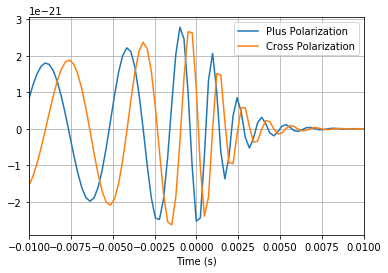

In [20]:
#plot both polarizations and zoom in near the merger time
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()